In [1]:
import pandas as pd

In [2]:
df_6_9 = pd.read_csv("./result/200601_200901_col_df.csv")
df_9_11 = pd.read_csv("./result/200901_201116_col_df.csv")

In [3]:
df_6_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         200 non-null    object 
 1   close_mean   200 non-null    float64
 2   volume_mean  200 non-null    float64
 3   kind         200 non-null    int64  
 4   kospi_kind   200 non-null    int64  
 5   eps          200 non-null    object 
 6   per          158 non-null    float64
 7   bps          200 non-null    object 
 8   pbr          200 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 14.2+ KB


In [4]:
df_9_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         200 non-null    object 
 1   close_mean   200 non-null    float64
 2   volume_mean  200 non-null    float64
 3   kind         200 non-null    int64  
 4   kospi_kind   200 non-null    int64  
 5   eps          200 non-null    object 
 6   per          158 non-null    object 
 7   bps          200 non-null    object 
 8   pbr          200 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.2+ KB


In [5]:
import math

def del_rest(val):
    return str(val).replace(',','')

def del_na_from_per(raw):
    if math.isnan(raw.per):
        return raw.close_mean / raw.eps_new
    else:
        return raw.per

def del_na_from_pbr(raw):
    if math.isnan(raw.pbr):
        return raw.close_mean / raw.bps_new
    else:
        return raw.pbr


df_6_9['eps_new'] = df_6_9['eps'].apply(del_rest).astype('float')
df_6_9['bps_new'] = df_6_9['bps'].apply(del_rest).astype('float')

df_9_11['eps_new'] = df_9_11['eps'].apply(del_rest).astype('float')
df_9_11['per'] = df_9_11['per'].apply(del_rest).astype('float')
df_9_11['bps_new'] = df_9_11['bps'].apply(del_rest).astype('float')

df_6_9.fillna(0, inplace=True)
df_9_11.fillna(0, inplace=True)

In [6]:
df_6_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         200 non-null    object 
 1   close_mean   200 non-null    float64
 2   volume_mean  200 non-null    float64
 3   kind         200 non-null    int64  
 4   kospi_kind   200 non-null    int64  
 5   eps          200 non-null    object 
 6   per          200 non-null    float64
 7   bps          200 non-null    object 
 8   pbr          200 non-null    float64
 9   eps_new      200 non-null    float64
 10  bps_new      200 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 17.3+ KB


In [7]:
df_6_9.head()

,code,close_mean,volume_mean,kind,kospi_kind,eps,per,bps,pbr,eps_new,bps_new
0,A027410,4290.984848,1.502279e+05,21,7,111,21.59,"15,611",0.27,111.0,15611.0
1,A282330,134318.181818,4.267236e+04,16,7,"1,912",18.55,"35,933",3.87,1912.0,35933.0
2,A138930,5238.560606,1.349248e+06,21,6,531,3.12,"26,533",0.19,531.0,26533.0
3,A001040,86827.272727,9.240736e+04,21,7,770,16.77,"141,320",0.61,770.0,141320.0
4,A079160,20905.015152,5.248201e+05,26,11,"-5,963",0.00,726,28.18,-5963.0,726.0


In [8]:
df_9_11.head()

,code,close_mean,volume_mean,kind,kospi_kind,eps,per,bps,pbr,eps_new,bps_new
0,A027410,4212.735849,1.667225e+05,21,7,182,15.36,"15,772",0.26,182.0,15772.0
1,A282330,125330.188679,4.816287e+04,16,7,"2,980",16.31,"38,910",3.17,2980.0,38910.0
2,A138930,5428.113208,1.330164e+06,21,6,431,0.00,0,0.00,431.0,0.0
3,A001040,80815.094340,7.697700e+04,21,7,"1,773",13.49,"142,604",0.57,1773.0,142604.0
4,A079160,21969.811321,3.859889e+05,26,11,"-3,246",0.00,"3,923",5.72,-3246.0,3923.0


In [9]:
kind_dummy_6_9 = pd.get_dummies(df_6_9.kind, prefix="kind", dtype=float)

x_6_9 = df_6_9.drop(columns=['code','close_mean','volume_mean','kind','kospi_kind','eps','bps']).astype('float')
y_6_9 = df_6_9.close_mean.astype('float')

In [10]:
print(x_6_9.shape, y_6_9.shape)

x_6_9.info()

(200, 4) (200,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   per      200 non-null    float64
 1   pbr      200 non-null    float64
 2   eps_new  200 non-null    float64
 3   bps_new  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
x_6_9_val = x_6_9.values
x_6_9_dummy_val = kind_dummy_6_9.values
y_6_9_val = y_6_9.values

lin_fitter_for_dummy = LinearRegression()
lin_fitter_for_dummy.fit(x_6_9_dummy_val, y_6_9_val)

y_6_9_dummy_predict = lin_fitter_for_dummy.predict(x_6_9_dummy_val)

y_6_9_val_delete_kind_effect = y_6_9_val - y_6_9_dummy_predict


lin_fitter_for_val = LinearRegression()
lin_fitter_for_val.fit(x_6_9_val, y_6_9_val_delete_kind_effect)

y_fin_predict = lin_fitter_for_val.predict(x_6_9_val)

findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


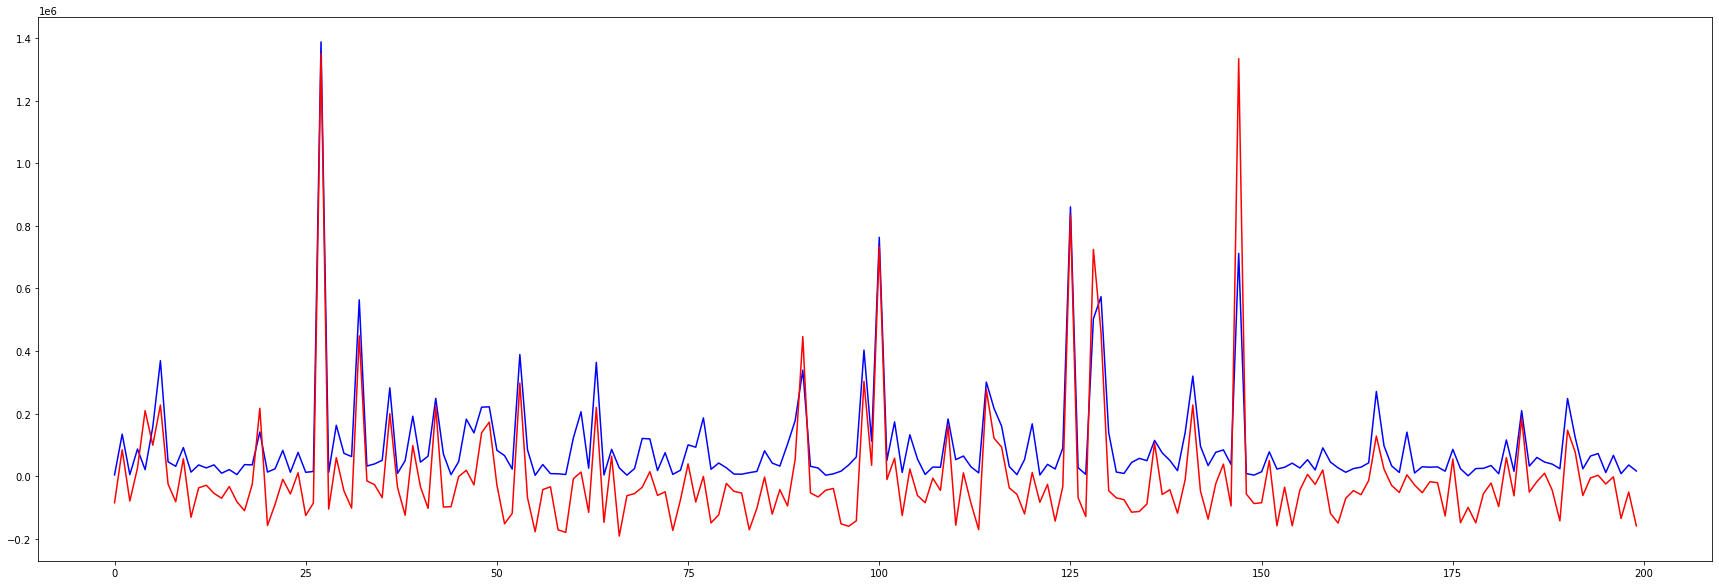

In [13]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(y_6_9_val)), y_6_9_val, color="b")
ax.plot(range(len(y_6_9_val)), y_6_9_val_delete_kind_effect + y_fin_predict, color="r")
plt.show()

In [14]:
coef_df = pd.DataFrame()
coef_df['name'] = kind_dummy_6_9.columns.values
coef_df['coef'] = lin_fitter_for_dummy.coef_

pred_real = pd.DataFrame()
pred_real['code'] = df_6_9.code.values
pred_real['real'] = y_6_9_val
pred_real['pred'] = y_6_9_val_delete_kind_effect + y_fin_predict
pred_real['diff'] = y_6_9_val - y_6_9_val_delete_kind_effect + y_fin_predict

In [15]:
coef_df.sort_values(by='coef')

,name,coef
17,kind_22,-62747.103749
1,kind_3,-59260.588598
18,kind_24,-58810.626477
8,kind_12,-49665.007790
12,kind_17,-47928.391628
13,kind_18,-41148.261758
3,kind_6,-33719.868901
6,kind_10,-33675.342386
16,kind_21,-21767.754002
10,kind_15,-17296.404449


In [16]:
df_6_9[df_6_9.kind==5]

,code,close_mean,volume_mean,kind,kospi_kind,eps,per,bps,pbr,eps_new,bps_new
6,A097950,369083.333333,92575.575758,5,7,"6,802",8.21,"343,497",0.95,6802.0,343497.0
51,A005610,65878.787879,14571.621212,5,7,"-2,234",0.00,"36,919",1.69,-2234.0,36919.0
63,A004370,363818.181818,38075.621212,5,7,"5,952",18.19,"346,917",1.05,5952.0,346917.0
66,A001680,26548.484848,361767.878788,5,7,952,6.91,"30,129",0.86,952.0,30129.0
77,A049770,186462.121212,6906.272727,5,7,"2,117",10.74,"182,022",0.98,2117.0,182022.0
88,A005300,102372.727273,32553.939394,5,7,"1,682",0.00,"145,448",0.70,1682.0,145448.0
90,A002270,338916.666667,5116.227273,5,7,"49,759",0.00,"830,625",0.42,49759.0,830625.0
97,A005180,61671.212121,46595.181818,5,7,"2,847",11.37,"66,824",0.90,2847.0,66824.0
110,A145990,53048.484848,81205.227273,5,7,"1,382",8.49,"112,498",0.35,1382.0,112498.0
129,A007310,573500.000000,6468.106061,5,7,"9,843",15.91,"394,128",1.41,9843.0,394128.0


"미채용"CPC_KOSPI200_NONE= 0

"건설기계"CPC_KOSPI200_CONSTRUCTIONS_MACHINERY= 1

"조선운송"CPC_KOSPI200_SHIPBUILDING_TRANSPORTATION= 2

"철강소재"CPC_KOSPI200_STEELS_METERIALS= 3

"에너지화학"CPC_KOSPI200_ENERGY_CHEMICALS= 4

"정보통신"CPC_KOSPI200_IT= 5

"금융"CPC_KOSPI200_FINANCE= 6

"필수소비재"CPC_KOSPI200_CUSTOMER_STAPLES= 7

"자유소비재"CPC_KOSPI200_CUSTOMER_DISCRETIONARY= 8

In [17]:
pred_real_sorted = pred_real.sort_values(by=['diff'])
pred_real_sorted

,code,real,pred,diff
57,A024110,8436.212121,-3.371968e+04,-25283.469593
155,A036460,26331.818182,-4.419937e+04,-24021.335956
93,A008560,3290.303030,-4.449839e+04,-23043.314966
94,A006800,7736.212121,-3.908261e+04,-22073.445794
37,A005940,9188.484848,-3.525627e+04,-19699.373636
...,...,...,...,...
19,A002380,141537.878788,2.169231e+05,368616.893185
4,A079160,20905.015152,2.094536e+05,422968.917766
90,A002270,338916.666667,4.461704e+05,494325.087994
128,A000670,503234.848485,7.244906e+05,511476.217174


In [18]:
pred_real_2 = pd.DataFrame()
pred_real_2['code'] = df_6_9.code.values
pred_real_2['real'] = y_6_9_val
pred_real_2['pred'] = y_fin_predict

pred_real_2_sorted = pred_real_2.sort_values(by=['pred'])
pred_real_2_sorted

,code,real,pred
79,A000150,42263.636364,-48302.696897
155,A036460,26331.818182,-47276.260198
46,A326030,182383.720930,-46162.354588
96,A003000,36059.848485,-42034.400487
177,A088350,1495.227273,-39979.795930
...,...,...,...
19,A002380,141537.878788,222001.069034
90,A002270,338916.666667,300789.418802
4,A079160,20905.015152,305758.757895
128,A000670,503234.848485,366366.008841


# 9 to 11

In [19]:
kind_dummy_9_11 = pd.get_dummies(df_9_11.kind, prefix="kind", dtype=float)

x_9_11 = df_9_11.drop(columns=['code','close_mean','volume_mean','kind','kospi_kind','eps','bps']).astype('float')
y_9_11 = df_9_11.close_mean.astype('float')

x_9_11_val = x_9_11.values
x_9_11_dummy_val = kind_dummy_9_11.values
y_9_11_val = y_9_11.values

lin_fitter_for_dummy = LinearRegression()
lin_fitter_for_dummy.fit(x_9_11_dummy_val, y_9_11_val)

y_9_11_dummy_predict = lin_fitter_for_dummy.predict(x_9_11_dummy_val)

y_9_11_val_delete_kind_effect = y_9_11_val - y_9_11_dummy_predict


lin_fitter_for_val = LinearRegression()
lin_fitter_for_val.fit(x_9_11_val, y_9_11_val_delete_kind_effect)

y_fin_predict = lin_fitter_for_val.predict(x_9_11_val)

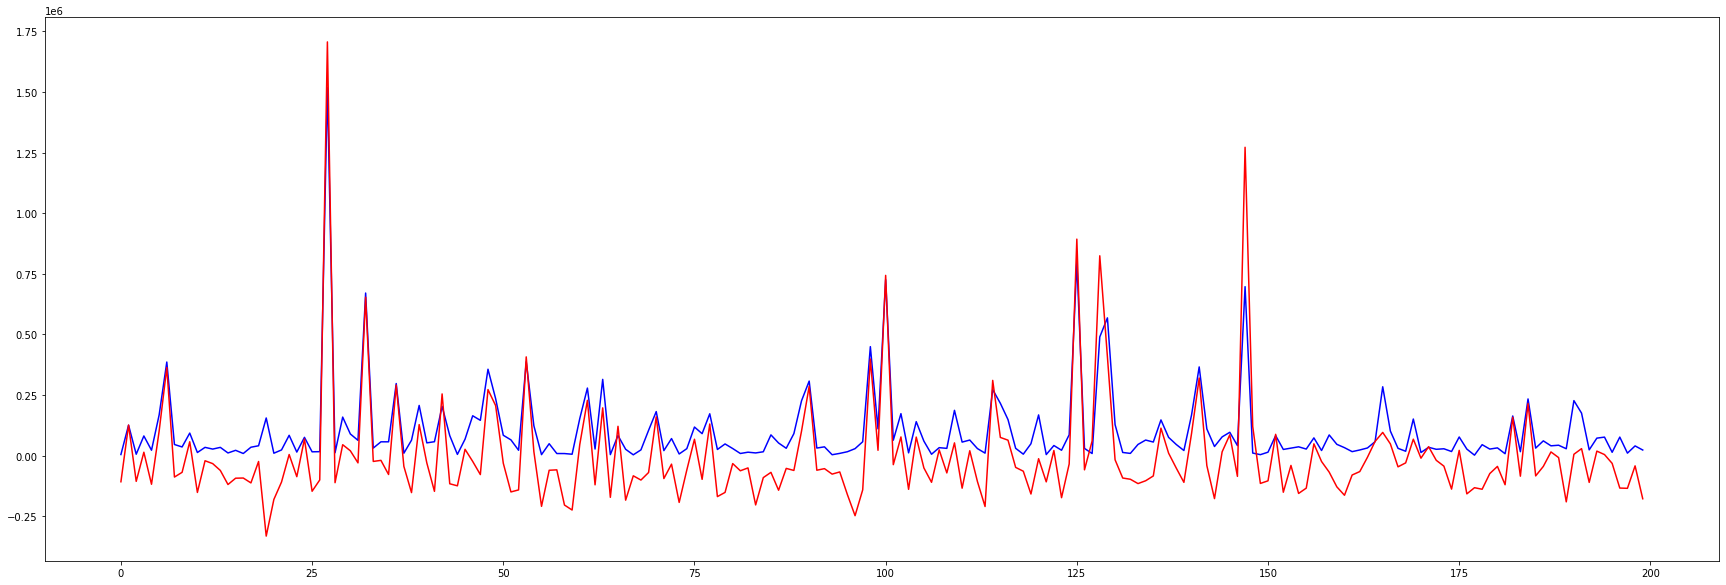

In [20]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(y_9_11_val)), y_9_11_val, color="b")
ax.plot(range(len(y_9_11_val)), y_9_11_val_delete_kind_effect + y_fin_predict, color="r")
plt.show()

In [21]:
coef_df = pd.DataFrame()
coef_df['name'] = kind_dummy_9_11.columns.values
coef_df['coef'] = lin_fitter_for_dummy.coef_

pred_real = pd.DataFrame()
pred_real['code'] = df_9_11.code.values
pred_real['real'] = y_9_11_val
pred_real['pred'] = y_9_11_val_delete_kind_effect + y_fin_predict
pred_real['diff'] = y_9_11_val - y_9_11_val_delete_kind_effect + y_fin_predict

In [22]:
coef_df.sort_values(by='coef')

,name,coef
17,kind_22,-65325.603700
1,kind_3,-60182.207473
18,kind_24,-60049.943322
8,kind_12,-51191.952756
12,kind_17,-49897.773511
13,kind_18,-44536.547096
3,kind_6,-35034.330115
6,kind_10,-34862.679171
16,kind_21,-21561.590335
10,kind_15,-12242.700942


In [23]:
pred_real_sorted = pred_real.sort_values(by=['diff'])
pred_real_sorted

,code,real,pred,diff
19,A002380,1.550189e+05,-3.323871e+05,-158004.447061
155,A036460,2.677170e+04,-1.344402e+05,-113703.443034
196,A004800,7.612830e+04,-1.342100e+05,-106157.460205
15,A294870,2.156887e+04,-9.347819e+04,-56816.118060
93,A008560,3.340000e+03,-7.662710e+04,-52762.953527
...,...,...,...,...
114,A068270,2.721981e+05,3.101397e+05,349532.966027
127,A003520,8.320566e+03,6.012018e+04,363390.965838
27,A051900,1.518774e+06,1.706961e+06,517589.240433
128,A000670,4.894906e+05,8.243364e+05,625416.453395


In [24]:
pred_real_2 = pd.DataFrame()
pred_real_2['code'] = df_9_11.code.values
pred_real_2['real'] = y_9_11_val
pred_real_2['pred'] = y_fin_predict

pred_real_2_sorted = pred_real_2.sort_values(by=['pred'])
pred_real_2_sorted

,code,real,pred
19,A002380,1.550189e+05,-322705.221790
196,A004800,7.612830e+04,-158247.888664
155,A036460,2.677170e+04,-137457.688317
96,A003000,2.847264e+04,-120859.109869
158,A009540,8.502453e+04,-92063.340700
...,...,...,...
127,A003520,8.320566e+03,207595.291984
125,A036570,7.998491e+05,211352.314411
27,A051900,1.518774e+06,352888.465705
128,A000670,4.894906e+05,480131.123206


In [25]:
pred_real_2_sorted.iloc[-50:]

,code,real,pred
166,A009240,1.010453e+05,17943.160092
122,A010780,4.134245e+04,18210.200582
197,A093370,9.975849e+03,19503.887842
102,A018260,1.728491e+05,22077.717392
129,A007310,5.681321e+05,22924.807796
156,A071050,7.287358e+04,27513.635773
88,A005300,9.046415e+04,31834.414403
30,A066570,8.907358e+04,36286.543506
136,A139480,1.470000e+05,36862.666790
130,A271560,1.276887e+05,38673.155162
